# EECS764P Coursework 4
- Name: Bheki Maenetja
- Student ID: 230382466

## Imports

In [3]:
# !pip install plotly
# !pip install pandas-datareader

import numpy as np

from scipy.stats import t, norm, skew, kurtosis, laplace
from scipy.optimize import minimize
import pandas_datareader.data as web
from pandas_datareader import wb

from datetime import datetime

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
# pio.renderers.default = "iframe"

## Plotting Functions

In [2]:
# Plotting functions
def plot_data(x=None, y=None, z=None, size=None, colour=None, title="", colour_title="", x_label="", y_label="", name="", mode="markers", text="", fill=None, **traces):
    """
    General purpose function for plotting scatter plots in plotly.
    """
    fig = go.Figure(layout={
        "title": title,
        "xaxis": {"title": x_label},
        "yaxis": {"title": y_label}
    })

    marker = dict()
    
    if size is not None:
        marker["size"] = size
        marker["sizeref"] = 0.01
    if colour is not None:
        marker["color"] = colour
        marker["showscale"] = True
        marker["colorbar"] = dict(title=colour_title)
    
    if z is None:
        data = go.Scatter(
            x=x,
            y=y,
            mode=mode,
            name=name,
            text=text,
            fill=fill,
            marker=marker,
        )
    else:
        data = go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode=mode,
            name=name,
            text=text,
            marker=marker,
        )

    if x is not None and y is not None:
        fig.add_trace(data)
    
    for t in traces:
        fig.add_trace(traces[t])
    
    return fig

def create_trace(x=None, y=None, z=None, size=None, colour=None, colour_title="", name="", mode="lines", text="", fill=None):
    marker = dict()
    
    if size is not None:
        marker["size"] = size
        marker["sizeref"] = 0.01
    if colour is not None:
        marker["color"] = colour
        marker["showscale"] = True
        marker["colorbar"] = dict(title=colour_title)
    
    if z is None:
        trace = go.Scatter(
            x=x,
            y=y,
            mode=mode,
            name=name,
            text=text,
            fill=fill,
            marker=marker
        )
    else:
        trace = go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode=mode,
            name=name,
            text=text,
            marker=marker
        )
    
    return trace

def create_histogram(x=None, y=None, histnorm="", name=""):
    return go.Histogram(
        x=x,
        y=None,
        histnorm=histnorm,
        name=name,
    )

def create_candle_stick(x=None, open=None, close=None, high=None, low=None, name=""):
    return go.Candlestick(
        x=x,
        open=open,
        close=close,
        high=high,
        low=low,
        name=name,
    )

def plot_collection(plots, rows=1, cols=1, title="", subplot_titles=[], x_labels={}, height=1000):
    specs = [
        [{"type": "xy"} for c in range(cols)] 
        for r in range(rows)
    ]
    
    fig = make_subplots(
        rows=rows, 
        cols=cols, 
        subplot_titles=subplot_titles,
        specs=specs,
    )
    
    fig.update_layout({
        "title": title,
        "height": height,
    })

    # Add traces
    for k in plots:
        for i in range(len(plots[k].data)):
            fig.add_trace(plots[k].data[i], row=k[0], col=k[1])

    # Update axes
    for k in plots:
        fig.update_xaxes(title_text=x_labels.get(k, ""), row=k[0], col=k[1])

    return fig

## Question 1

/Users/bhekimaenetja/.local/share/virtualenvs/small-projects-ai-NRjJWIjk/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning:

Non-standard ISO country codes: WLD



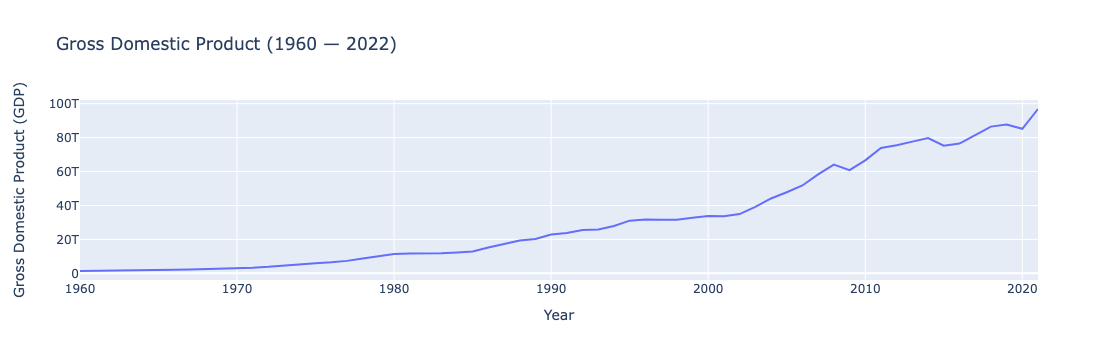

In [6]:
gdp_data = wb.download(indicator="NY.GDP.MKTP.CD", country="WLD", start="1960" , end="2021")
time = np.arange(1960,2022)
gdp = gdp_data.iloc[:,0].astype(float).to_numpy()
# Data is returned in inverse chronological order , so reverse order
gdp = np.flip(gdp)
plot_data(
    time,
    gdp,
    title="Global Gross Domestic Product (1960 — 2021)",
    x_label="Year",
    y_label="GDP",
    mode="lines",
)